## Draw the landmarks in an image

In [226]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt

In [248]:
#Funtion for calculating the angles
def calculate_angle_coord(p_cood_list):
    a = np.array(p_cood_list[0]) # First
    b = np.array(p_cood_list[1]) # Mid
    c = np.array(p_cood_list[2]) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [258]:
# point to calculate the angles
p_list = [[11,23,25],[12,24,26],[23, 25, 27],[24,26,28],[26,28,32]]

![Alt text](https://camo.githubusercontent.com/7fbec98ddbc1dc4186852d1c29487efd7b1eb820c8b6ef34e113fcde40746be2/68747470733a2f2f6d65646961706970652e6465762f696d616765732f6d6f62696c652f706f73655f747261636b696e675f66756c6c5f626f64795f6c616e646d61726b732e706e67)



In [260]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# For static images:

path = 'prueba/person2.jpg'
#image = cv2.imread(path)

IMAGE_FILES = [path]
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    # print(
    #     f'Nose coordinates: ('
    #     f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
    #     f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    # )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)

    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        
    landmrk_value = [l.value for l in mp_pose.PoseLandmark]

    text_size = int(round(np.linalg.norm(annotated_image.shape)*0.001,0))

    for i in landmrk_value:
      if  results.pose_landmarks.landmark[i].visibility > 0.5 : 
        cv2.putText(annotated_image, str(i), (int((results.pose_landmarks.landmark[i].x)*annotated_image.shape[1]) , 
                                              int((results.pose_landmarks.landmark[i].y)*annotated_image.shape[0])),
                    cv2.FONT_HERSHEY_PLAIN, text_size, (255, 0, 255), text_size)
           
    
    for i in range(len(p_list)):
        p_cood_list = []
        midle_point = p_list[i][1]
        for p in p_list[i]:
            if results.pose_landmarks.landmark[p].visibility > 0.5:
                p_corrd = (results.pose_landmarks.landmark[p].x, results.pose_landmarks.landmark[p].y)
                p_cood_list.append(p_corrd)
            else:
                break

        try:
            angle = int(calculate_angle_coord(p_cood_list))
            cv2.putText(annotated_image, str(f'ang{p_list[i]}: {angle}'), (int((results.pose_landmarks.landmark[midle_point].x)*annotated_image.shape[1]) , 
                          100+int((results.pose_landmarks.landmark[midle_point].y)*annotated_image.shape[0])),
                          cv2.FONT_HERSHEY_PLAIN, text_size, (255,0,0), text_size)

        except:
            pass
      
   
    
    cv2.imwrite('prueba/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.

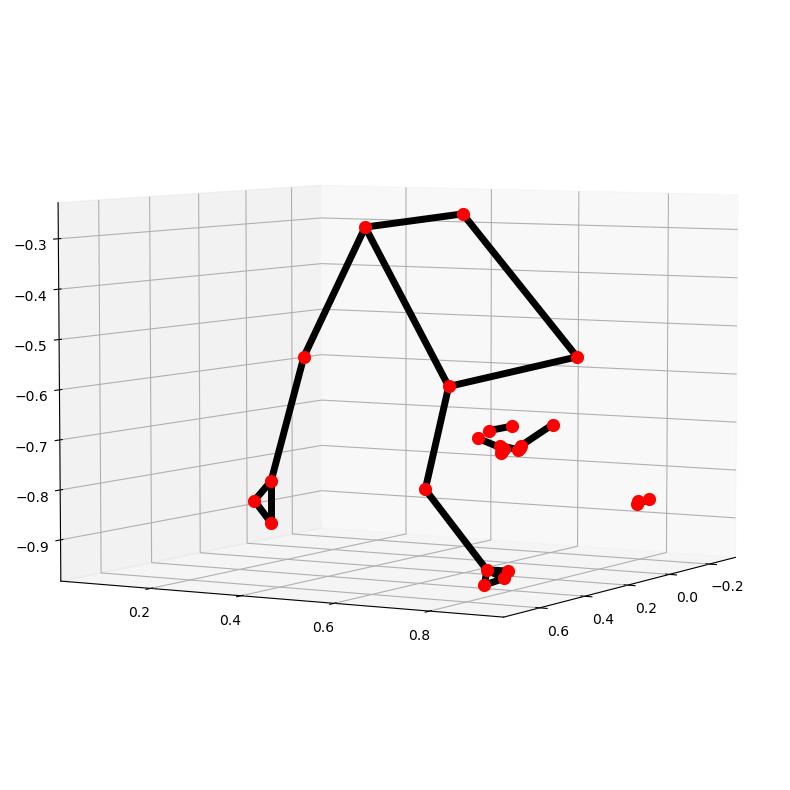

In [261]:
mp_drawing.plot_landmarks(results.pose_landmarks, mp_pose.POSE_CONNECTIONS, elevation = 5, azimuth= 30)

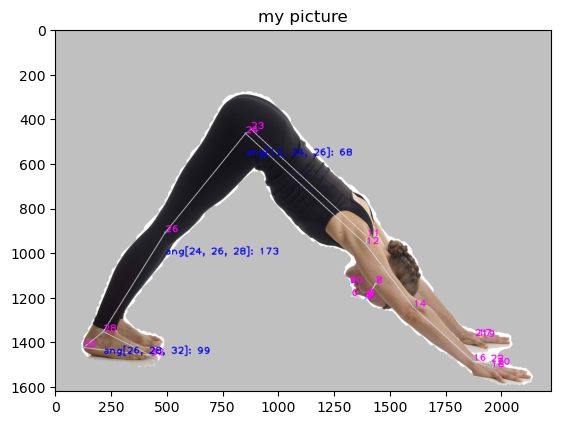

In [262]:
image_pose = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_pose)
plt.title('my picture')
plt.show()